In [70]:
import numpy as np
import pandas as pd

In [93]:
w1 = 0.2
w2 = 0.4
x1 = np.random.normal(1,1.5, 1000)
#x2 = np.random.normal(0.5, 2, 1000)
e = np.random.uniform(0.1,1, 1000)
#y_actual = w1*x1 + w2*x2 + e
y_actual = w1*x1 + e

In [94]:
import matplotlib.pyplot as plt

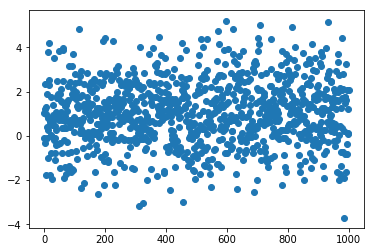

In [95]:
plt.scatter(np.linspace(0,1000,1000), x1 )

In [96]:
type(x1)

numpy.ndarray

In [97]:
col1 = x1.reshape(1000,1)
col2 = x2.reshape(1000,1)

In [98]:
data = np.hstack((col1, col2))

In [99]:
df = pd.DataFrame({'X1': data[:,0], 'X2': data[:, 1]})
df.head()

,X1,X2
0,-0.109485,0.302749
1,1.026081,-3.849252
2,-0.342560,0.849023
3,1.230923,0.553034
4,2.327789,-0.872724


- cost = squared.sum(diff(y_actual , y_predicted))
- delta_cost/d_w1 = -2/m * sum((y_actual - y_pred) * x1)
- delta_cost/d_e = -2/m * sum((y_actual - y_pred))

In [171]:
m = 0.1
c = 0
n = 1000
L = 0.01  # The learning Rate
ct = []
para = []
for epoch in range(0,1000):
    y_pred = m*x1 + c
    cost = -2/n * (sum(np.power((y_actual - y_pred), 2)))
    D_m = -2/n * (sum(x1*(y_actual - y_pred))) # Derivative wrt m
    D_c = (-2/n) * sum(y_actual - y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    ct.append(cost)
    para.append((m,c))  

In [172]:
pos = ct.index(min(ct, key = abs))
m = para[pos][0]
c = para[pos][1]
cost = ct[pos]

In [173]:
m,c, cost

(0.19140730228746552, 0.555141439401859, -0.13600021870828702)

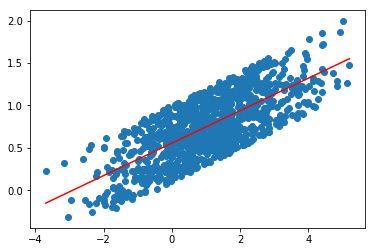

In [174]:
Y_pred = m*x1 + c

plt.scatter(x1, y_actual) 
plt.plot([min(x1), max(x1)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()